### EDA and DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# defining stylesheet for all figures in notebook
plt.style.use('gstyle.mplstyle')

In [3]:
df_in = pd.read_csv('../datasets/train.csv')

# to view all columns and names 
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [4]:
# column names shortened and changed to lowercase for ease of calling
df_in.columns = df_in.columns.str.lower()

sat_new_col = {'ms subclass': 'subclass', 'ms zoning': 'zoning', 'lot frontage': 'frontage', 'lot area': 'area', 'lot shape': 'shape',
                'land contour': 'contour', 'lot config': 'config', 'land slope': 'slope', 'condition 1': 'cond1', 'condition 2': 'cond2',
               'bldg type': 'type', 'house style': 'style', 'overall qual': 'qual', 'overall cond': 'cond', 'year built': 'built', 
               'year remod/add': 'remo', 'roof style': 'roof_s', 'roof matl': 'roof_m', 'exterior 1st': 'ext1', 'exterior 2nd': 'ext2', 
               'mas vnr type': 'veneer_t', 'mas vnr area': 'veneer_a', 'exter qual': 'ext_q', 'exter cond': 'ext_c', 'bsmt qual': 'bsmt_q', 
               'bsmt cond': 'bsmt_c', 'bsmt exposure': 'bsmt_e', 'bsmtfin type 1': 'bsmt_t1', 'bsmtfin sf 1': 'bsmt_sf1', 
               'bsmtfin type 2': 'bsmt_t2', 'bsmtfin sf 2': 'bsmt_sf2', 'bsmt unf sf': 'bsmt_usf', 'total bsmt sf': 'bsmt_sft', 
               'heating': 'heat', 'heating qc': 'heat_qc', 'central air': 'cent_air', '1st flr sf': '1f_sf', '2nd flr sf': '2f_sf', 
               'low qual fin sf': 'lqfin_sf', 'gr liv area': 'grla_sf', 'bsmt full bath': 'bsmt_fullb', 'bsmt half bath': 'bsmt_halfb',
               'full bath': 'full_b', 'half bath': 'half_b', 'bedroom abvgr': 'bed_abvgr', 'kitchen abvgr': 'kit_abvgr', 'kitchen qual': 'kit_qual',
               'totrms abvgrd': 'tot_room_abv', 'fireplace qu': 'fireplace_q', 'garage type': 'garage_t', 'garage yr blt': 'garage_yr', 
               'garage finish': 'garage_fin', 'garage cars': 'garage_cars', 'garage area': 'garage_a', 'garage qual': 'garage_q', 
               'garage cond': 'garage_c', 'paved drive': 'paved_dr', 'wood deck sf': 'wood_dk_sf', 'open porch sf': 'open_porch_sf', 
               'enclosed porch': 'enclosed_porch', '3ssn porch': 'porch_3s', '3ssn porch': 'porch_3s', 'pool area': 'pool_sq', 'pool qc': 'pool_q', 
               'misc feature': 'misc_f', 'misc val': 'misc_v', 'mo sold': 'month', 'yr sold': 'yr_sold', 'sale type': 'sale_t'
}
df_in.rename(columns = sat_new_col, inplace=True)
prices = df_in

In [5]:
# dropping two superfluous pid, id series

prices = prices.drop( ['id', 'pid'], axis=1)
prices.head()
prices.to_csv('../data/prices_all_clean.csv', index = False)

In [6]:
prices.describe()

,subclass,frontage,area,qual,cond,built,remo,veneer_a,bsmt_sf1,bsmt_sf2,bsmt_usf,bsmt_sft,1f_sf,2f_sf,lqfin_sf,grla_sf,bsmt_fullb,bsmt_halfb,full_b,half_b,bed_abvgr,kit_abvgr,tot_room_abv,fireplaces,garage_yr,garage_cars,garage_a,wood_dk_sf,open_porch_sf,enclosed_porch,porch_3s,screen porch,pool_sq,misc_v,month,yr_sold,saleprice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


* bedrooms: may be lofts or studios, keeping `0`-bed observations
* bathroom: `0` for number of bathrooms will be dropped
* `null` values for categories will be omitted
* collinear terms will be dropped
* not adjacent to alley, `Nan` to `0`
* no frontage to road (interior property), `Nan` to `0`

In [7]:
prices = prices[prices['full_b'] != 0]                  # elimiinating 0-bath 
prices['alley'] = prices['alley'].fillna(0)             # NaN alley to 0 
prices['frontage'] = prices['frontage'].fillna(0)       # NaN frontage to 0 frontage

(2043, 79)

In [19]:
# checking to make sure descriptives make sense
prices.describe()

,subclass,frontage,area,qual,cond,built,remo,veneer_a,bsmt_sf1,bsmt_sf2,bsmt_usf,bsmt_sft,1f_sf,2f_sf,lqfin_sf,grla_sf,bsmt_fullb,bsmt_halfb,full_b,half_b,bed_abvgr,kit_abvgr,tot_room_abv,fireplaces,garage_yr,garage_cars,garage_a,wood_dk_sf,open_porch_sf,enclosed_porch,porch_3s,screen porch,pool_sq,misc_v,month,yr_sold,saleprice
count,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,55.922539,57.814416,10112.724583,6.235073,5.590640,1973.436794,1985.037117,106.583647,466.125336,51.358795,579.013986,1096.498117,1175.941366,336.720280,4.120495,1516.782141,0.442711,0.064551,1.587951,0.381388,2.845616,1.023131,6.452394,0.627219,1978.656805,1.879505,501.280796,98.403443,48.653039,21.551372,2.764389,17.772458,2.343733,53.969338,6.208176,2007.779989,187007.806347
std,41.628857,33.328203,6778.440876,1.353597,1.059956,29.312754,20.636722,179.745679,462.333250,170.384931,439.655587,418.418278,393.880062,428.634697,45.590144,495.191930,0.514927,0.247978,0.536288,0.496812,0.775254,0.153897,1.516422,0.640683,24.951439,0.651656,188.989867,129.426992,65.725574,59.443643,26.180264,59.232337,37.503364,596.373437,2.732261,1.313795,78562.901883
min,20.000000,0.000000,1300.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,160.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1895.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,43.000000,7568.500000,5.000000,5.000000,1956.000000,1966.000000,0.000000,0.000000,0.000000,240.000000,819.000000,888.500000,0.000000,0.000000,1151.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,365.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,135000.000000
50%,50.000000,64.000000,9550.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,405.000000,0.000000,481.000000,1028.000000,1104.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167900.000000
75%,70.000000,79.000000,11644.000000,7.000000,6.000000,2002.000000,2004.000000,172.000000,755.500000,0.000000,812.000000,1342.000000,1421.000000,702.000000,0.000000,1735.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,585.500000,170.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,218000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,2.000000,2.000000,4.000000,2.000000,6.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


##### Dropping Null Values: 
 * I am dropping all rows where `null` totals is fewer than `100` which is about `10%`. <BR>
 * I am dropping columns where `null` total is greater than `800`, as about `~50%` of the data for all observations is missing. 

In [20]:
# dropping null rows if n_null < 100 (~10%) 
prices.dropna(subset=['bsmt_q', 'bsmt_c', 'bsmt_e', 'bsmt_t1', 'bsmt_sf1', 'veneer_t', 'veneer_a',
                    'bsmt_t2', 'bsmt_sf2', 'bsmt_usf', 'bsmt_sft', 'garage_yr','garage_t', 
                    'garage_fin', 'garage_cars', 'garage_a', 'garage_q', 'garage_c', 
                    'bsmt_fullb', 'bsmt_halfb'], inplace = True)
# drop series/ col /feature if > 800 entries null: keeping alley and frontage for later analyses
prices.drop(['pool_q', 'fence', 'misc_f', 'misc_v','fireplace_q'], axis = 1, inplace=True)

In [24]:
prices.isnull().sum()

subclass          0
zoning            0
frontage          0
area              0
street            0
alley             0
shape             0
contour           0
utilities         0
config            0
slope             0
neighborhood      0
cond1             0
cond2             0
type              0
style             0
qual              0
cond              0
built             0
remo              0
roof_s            0
roof_m            0
ext1              0
ext2              0
veneer_t          0
veneer_a          0
ext_q             0
ext_c             0
foundation        0
bsmt_q            0
bsmt_c            0
bsmt_e            0
bsmt_t1           0
bsmt_sf1          0
bsmt_t2           0
bsmt_sf2          0
bsmt_usf          0
bsmt_sft          0
heat              0
heat_qc           0
cent_air          0
electrical        0
1f_sf             0
2f_sf             0
lqfin_sf          0
grla_sf           0
bsmt_fullb        0
bsmt_halfb        0
full_b            0
half_b            0


In [25]:
prices.shape

(1859, 74)

### Addressing Collinearity and Correalation: 
* dropping one of two values with high collinearity
* dropping low-correalation values

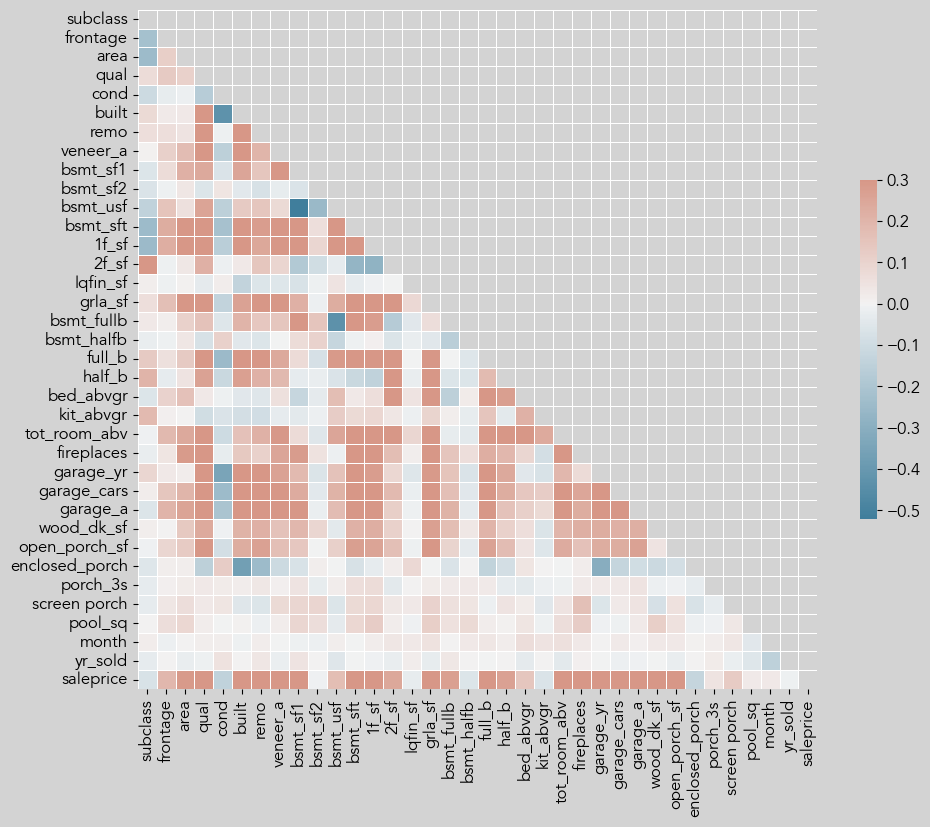

In [26]:
# code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# co linearity

corr = prices.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

* Many of the quality features appear to have high correalation to year and amongst other quality, but will keep for later analyses
* Year metrics are strongly correalated, whether negative (remo, year built) or positive. Will only use 1 year metric 
* Basement total area and finishsed/ unfinished are also highly correalted, will only use 1 basement metric
* Will keep garage features for further analysis

In [27]:
prices.drop(['bsmt_usf', 'yr_sold', 'garage_yr' ], axis = 1, inplace=True)
prices.shape

(1859, 71)

* will drop columns with very low corr
* keeping certain values (like month), which is identified by a `float` but is a `categorical` feature.

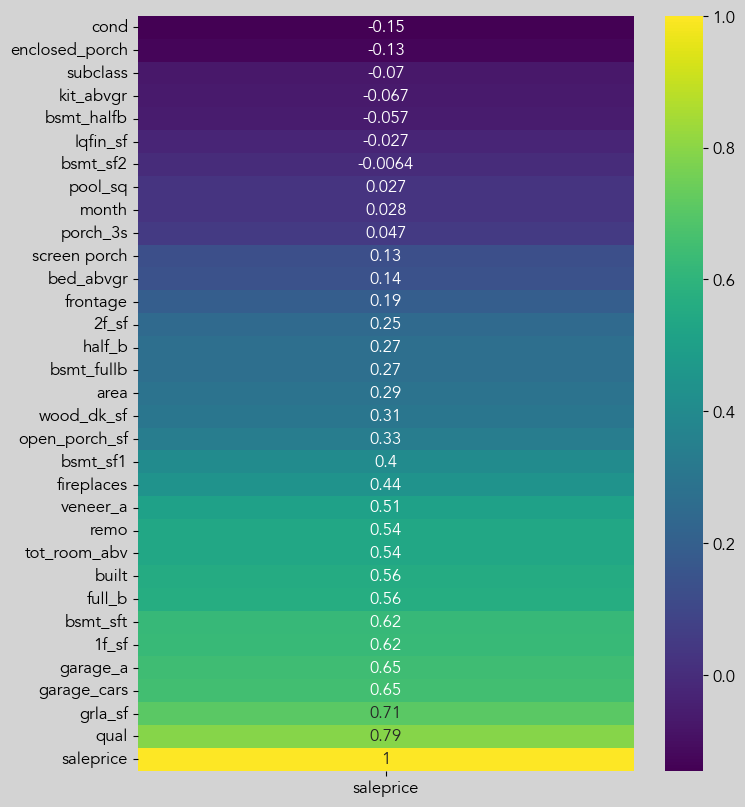

In [28]:
# correalation plot to select features of interest; code from lesson with heather

f, ax = plt.subplots(figsize=(8, 10));

corr = prices.corr()[['saleprice']].sort_values('saleprice')
sns.heatmap(corr, annot = True, cmap = 'viridis');

In [30]:
# dropping very low ( < | 0.08| ) corr. columns (considering month as categorical later):
prices.drop( ['bsmt_sf2', 'lqfin_sf', 'bsmt_halfb', 'kit_abvgr','porch_3s'], axis=1, inplace=True)
prices.to_csv('../data/high_corr_clean_data.csv', index = False)
prices.shape

(1859, 66)

In [31]:
# exporting clean CSV with alley and frontage, to hot-encode
prices.to_csv('../data/clean_all.csv', index = False)
prices.head()

,subclass,zoning,frontage,area,street,alley,shape,contour,utilities,config,slope,neighborhood,cond1,cond2,type,style,qual,cond,built,remo,roof_s,roof_m,ext1,ext2,veneer_t,veneer_a,ext_q,ext_c,foundation,bsmt_q,bsmt_c,bsmt_e,bsmt_t1,bsmt_sf1,bsmt_t2,bsmt_sft,heat,heat_qc,cent_air,electrical,1f_sf,2f_sf,grla_sf,bsmt_fullb,full_b,half_b,bed_abvgr,kit_qual,tot_room_abv,functional,fireplaces,garage_t,garage_fin,garage_cars,garage_a,garage_q,garage_c,paved_dr,wood_dk_sf,open_porch_sf,enclosed_porch,screen porch,pool_sq,month,sale_t,saleprice
0,60,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725,754,1479,0.0,2,1,3,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,3,WD,130500
1,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913,1209,2122,1.0,2,1,4,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,4,WD,220000
2,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057,0,1057,1.0,1,0,3,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,1,WD,109000
3,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744,700,1444,0.0,2,1,3,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,4,WD,174000
4,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831,614,1445,0.0,2,0,3,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,3,WD,138500


#### There are now only `66` variables, no nulls.

In [63]:
prices['garage_t'].value_counts()

Attchd     1167
Detchd      512
BuiltIn     128
Basment      27
2Types       18
CarPort       7
Name: garage_t, dtype: int64

In [ ]:
# sns.pairplot(prices, hue = 'saleprice');
# don't do this, took 30 minutes and produced no information. 

### Plots for preliminary analysis: 

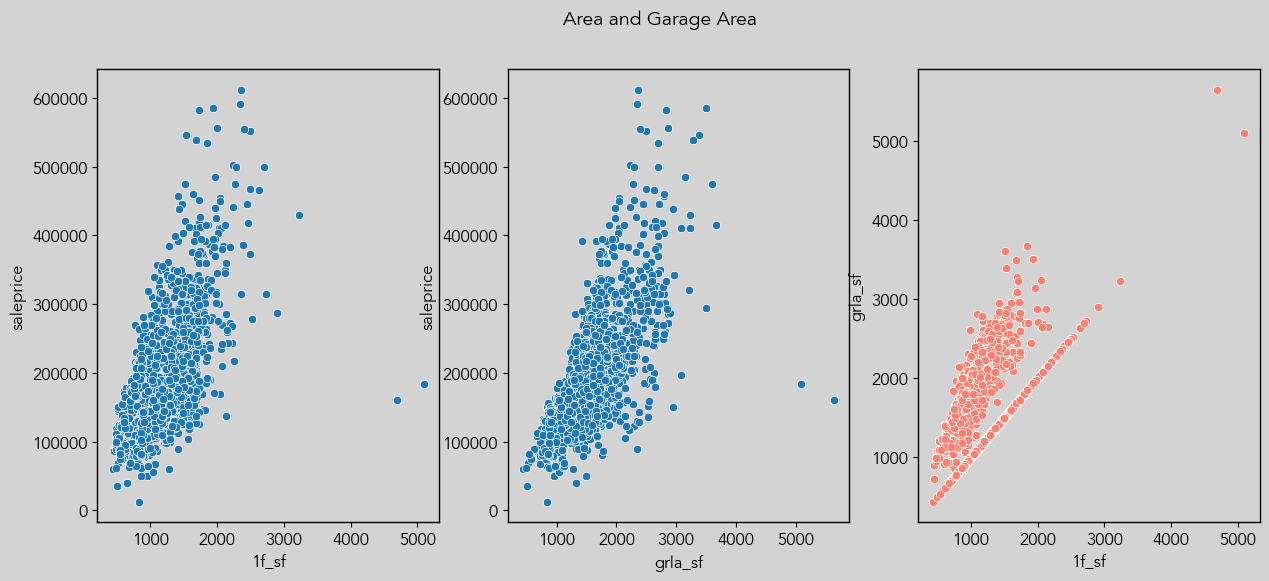

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(15, 6))
sf2 = prices
sf = prices[prices['grla_sf'] != 0 ]

fig.suptitle('Area and Garage Area')
sns.scatterplot(x=sf2['1f_sf'], y=sf2['saleprice'], data = prices, ax = ax[0], palette = 'colorblind');
sns.scatterplot(x=sf2['grla_sf'], y=sf2['saleprice'], data = prices, ax = ax[1], palette = 'colorblind');
sns.scatterplot(y=sf['grla_sf'], x=sf['1f_sf'], data = prices, ax = ax[2], color = 'salmon');  

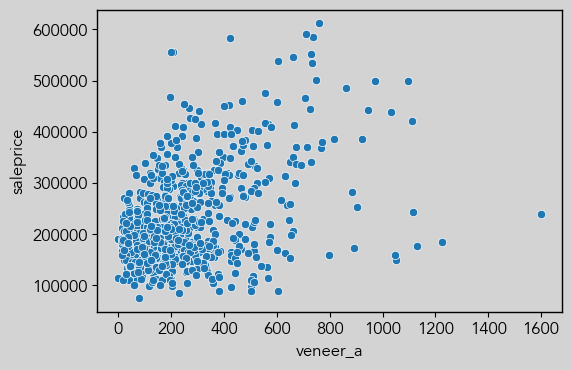

In [32]:
#veneer area vs. price, area > 0: 
veneer = prices[ prices['veneer_a']  > 0 ]

x = veneer['veneer_a']
y = veneer['saleprice']
sns.scatterplot(data=prices, x=x, y=y);

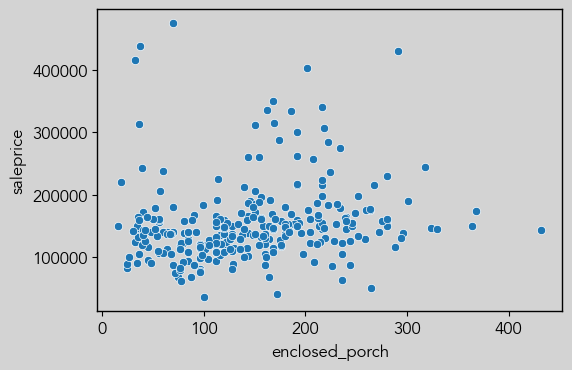

In [33]:
# porch area vs. price, area > 0: 
porch = prices[ prices['enclosed_porch']  > 0 ]

x = porch['enclosed_porch']
y = porch['saleprice']
sns.scatterplot(data=prices, x=x, y=y);

Porch should be considered as categorical [y/n]; plotting 300 or so entries with porch area suggest there is no linear relationship between price and enclosed porch area.

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categori

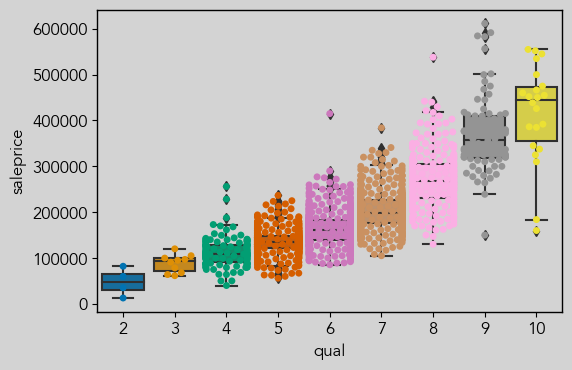

In [58]:
# quality vs. price
sns.boxplot(x="qual", y="saleprice", data = prices, palette = 'colorblind');   # categorical? 
sns.swarmplot(x="qual", y="saleprice", data = prices, palette = 'colorblind');

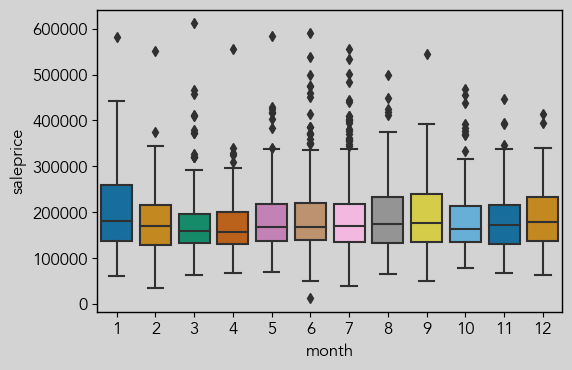

In [35]:
# month vs. fireplace
sns.boxplot(x="month", y="saleprice", data = prices, palette = 'colorblind');   # categorical? 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


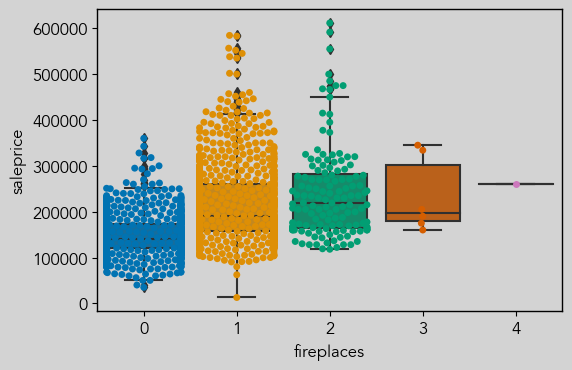

In [57]:
# fireplaces vs. price
sns.boxplot(x="fireplaces", y="saleprice", data = prices, palette = 'colorblind');   # categorical? 
sns.swarmplot(x="fireplaces", y="saleprice", data = prices, palette = 'colorblind'); 
 
# maybe only if  if n > 3 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categoric

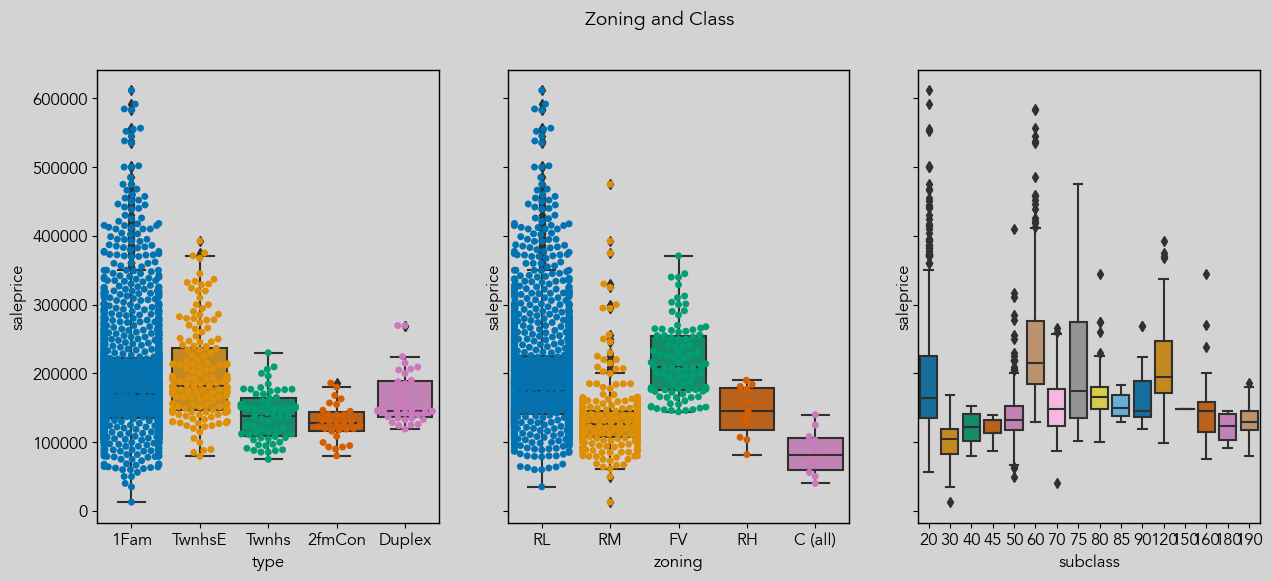

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 6))
fig.suptitle('Zoning and Class')
sns.boxplot(x="type", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');            # alley access is good, binary categorical 
sns.swarmplot(x="type", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');
sns.boxplot(x="zoning", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');           # zoning
sns.swarmplot(x="zoning", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');
sns.boxplot(x="subclass", y="saleprice", data = prices, ax = ax[2], palette = 'colorblind');         # subclass

The following classes seem to be strongly cluster around central tendencies, so will include these specific categorical variables in analysis.

 Codes      | Description
---         | ---               
40          | 1-STORY W/FINISHED ATTIC ALL AGES
45	        | 1-1/2 STORY - UNFINISHED ALL AGES 
85	        | SPLIT FOYER    
180	        | PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

<br>

 Codes      | Description
---         | ---     
C           | COMMERCIAL          
A           | AGRICULTURAL
RH	        | RESIDENTIAL HIGH DENSITY 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


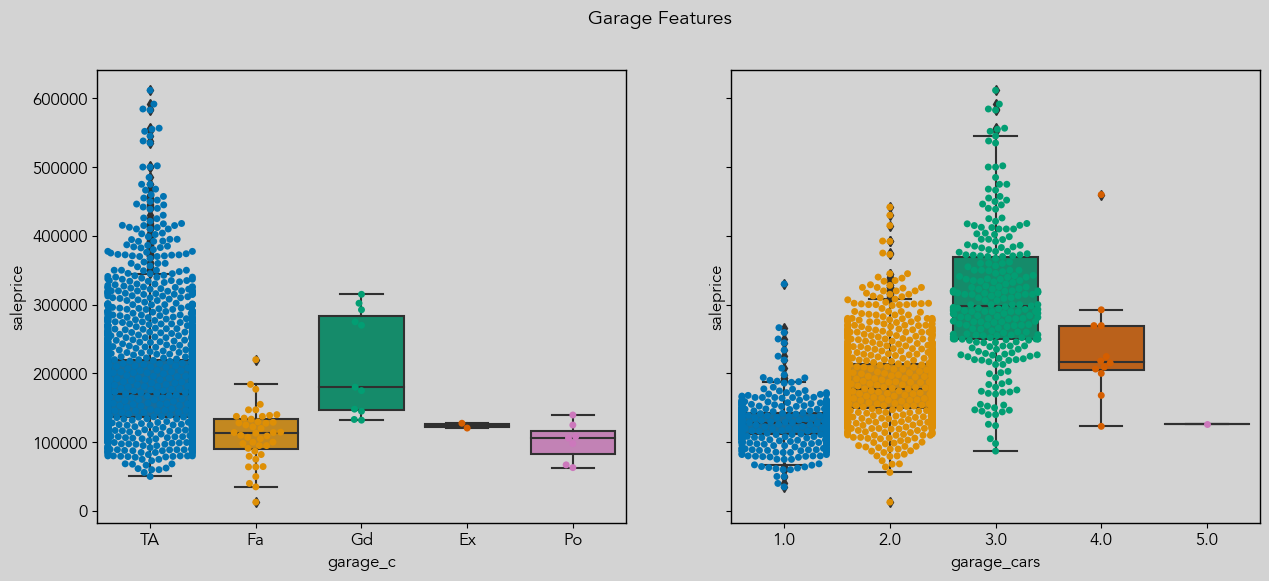

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 6))
fig.suptitle('Garage Features')
sns.boxplot(x="garage_c", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');        # garage condition
sns.swarmplot(x="garage_c", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind'); 
sns.boxplot(x="garage_cars", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');          
sns.swarmplot(x="garage_cars", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');  

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categori

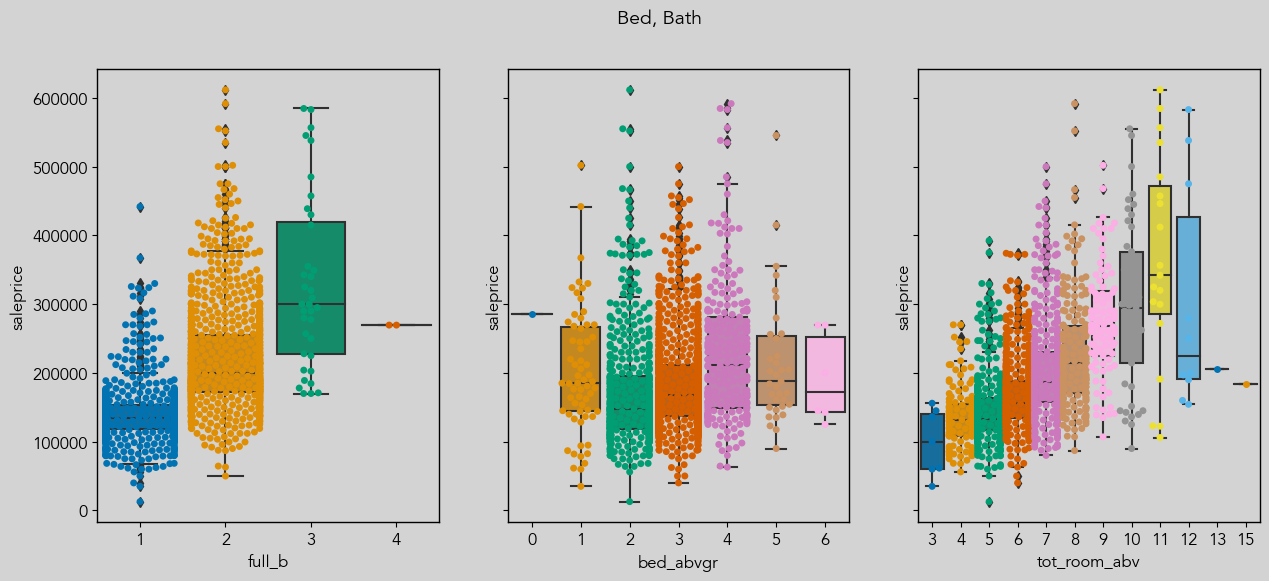

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 6))
fig.suptitle('Bed, Bath')
sns.boxplot(x="full_b", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');          # full bath 
sns.swarmplot(x="full_b", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');        
sns.boxplot(x="bed_abvgr", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');        # bedrooms
sns.swarmplot(x="bed_abvgr", y="saleprice", data = prices, ax = ax[1],palette = 'colorblind');             
sns.boxplot(x="tot_room_abv", y="saleprice", data = prices, ax = ax[2], palette = 'colorblind');    # total rooms
sns.swarmplot(x="tot_room_abv", y="saleprice", data = prices, ax = ax[2], palette = 'colorblind');    

# only use bedroom = 3 ? 

Bath and Bedroom features should be stictly numeric. Full baths can be numeric, but bedroom number does not appear linear, so I will treat as categorical. 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


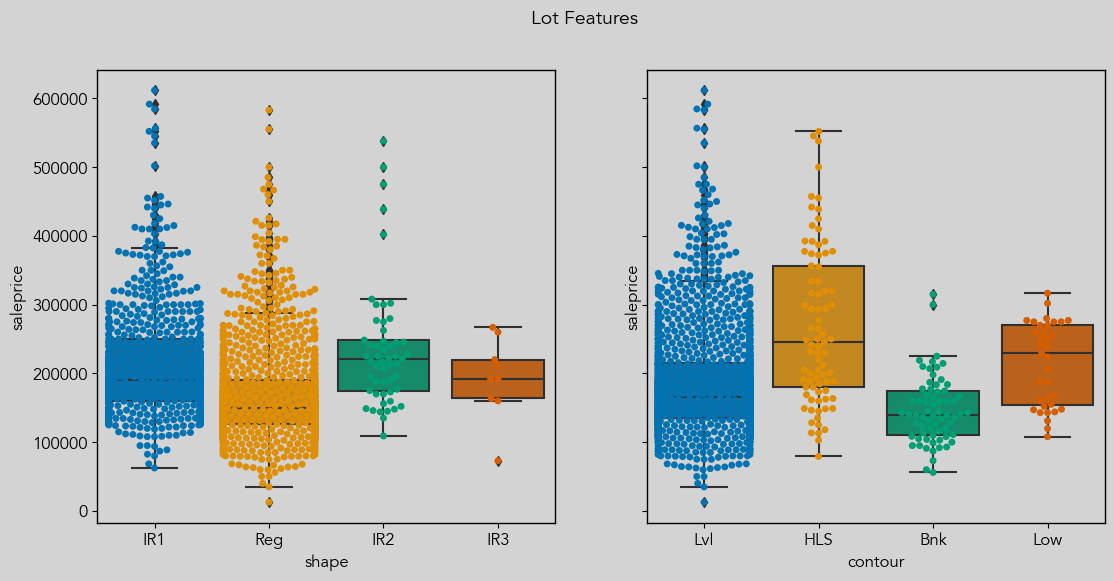

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 6))
fig.suptitle('Lot Features')
sns.swarmplot(x="shape", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');
sns.boxplot(x="shape", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');
sns.swarmplot(x="contour", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');
sns.boxplot(x="contour", y="saleprice", data = prices, ax = ax[1], palette = 'colorblind');

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


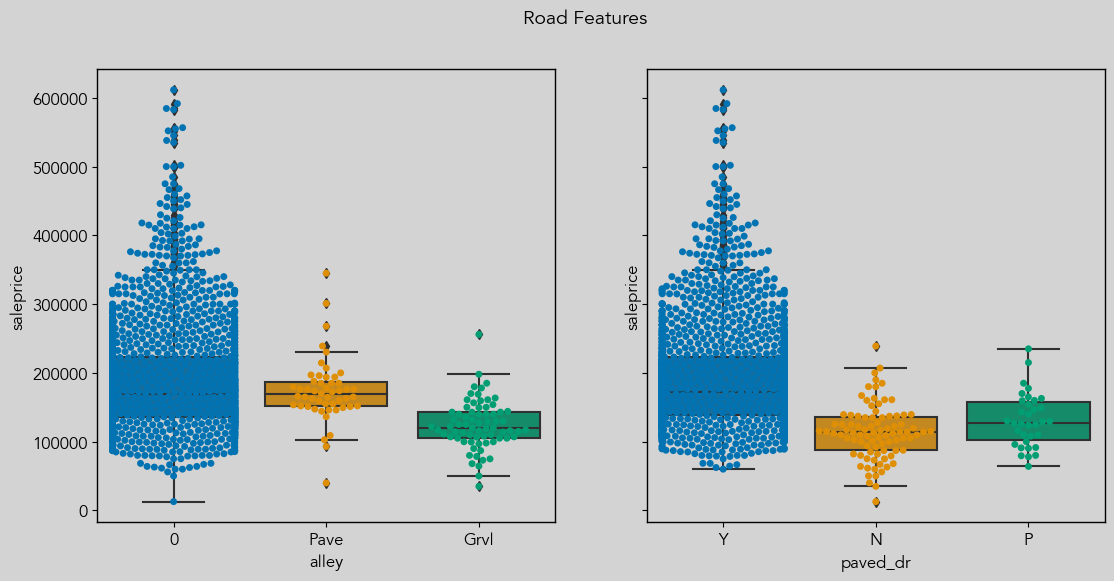

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 6))
fig.suptitle('Road Features')
sns.boxplot(x="alley", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');            # alley
sns.swarmplot(x="alley", y="saleprice", data = prices, ax = ax[0], palette = 'colorblind');
sns.boxplot(x="paved_dr", y="saleprice", data = prices,ax = ax[1], palette='colorblind');            # drive 
sns.swarmplot(x="paved_dr", y="saleprice", data = prices,ax = ax[1], palette='colorblind');          # lot condition

Most properties don't have alley, but those that do are distributed evenly around type. 

#### Checking for duplicates: 

In [76]:
prices.duplicated().sum()

0